In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [5]:
file = os.path.join("../Resources/Autism.csv")
asdDF = pd.read_csv(file)
pd.set_option('display.max_columns', None)
asdDF.head()


,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [6]:
X = pd.get_dummies(asdDF.drop(["Class", "Case No"], axis=1))
# keeping just the question columns because those had the highest importance from RandomForestTesting.ipynb


X = X[["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9","A10"]]
y = asdDF["Class"]
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1
2,1,1,0,1,1,0,0,1,0,0
3,1,0,0,0,1,1,1,1,1,1
4,1,1,1,0,0,0,0,1,0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
rf = RandomForestClassifier(n_estimators=13)
rf = rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(f'Training Score: {rf_train_score}')
print(f'Testing Score: {rf_test_score}')

Training Score: 1.0
Testing Score: 0.9571428571428572


In [9]:
importances = rf.feature_importances_
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.2504192221310992, 'A9'),
 (0.18115196317626944, 'A5'),
 (0.11594199408855711, 'A6'),
 (0.11379745871394222, 'A3'),
 (0.08540261565867932, 'A4'),
 (0.06574888546307506, 'A7'),
 (0.05390743073457392, 'A1'),
 (0.04574270649734512, 'A10'),
 (0.045536760800414064, 'A8'),
 (0.04235096273604455, 'A2')]

In [10]:
# set up variables to determine if folks who answered "Slightly Disagree" and "Definietly Disagree" (the answers that 
# corespond with it being an ASD trait) are more likely to have the class of Yes for being autistic.

totalPeople = asdDF["Class"].count() #1118
ASDy = asdDF[asdDF.Class=="YES"]
ASDyCount = ASDy["Class"].count() #358 
ASDyA9Count = ASDy[ASDy["A9"]==1]["A9"].count() #284
totalA9Count = asdDF[asdDF["A9"]==1]["A9"].count()


In [11]:
from statsmodels.stats.proportion import proportions_ztest
count = ASDyA9Count
nobs = totalA9Count
value = ASDyCount/totalPeople
stat, pval = proportions_ztest(count, nobs, value)

pval

5.984858034448194e-59

In [12]:
# pval = 5.984858034448194e-59 With small pval, we reject the null, so there is evidence to show that if someone answers yes to question A9, 
# they truly have a higher rate of Autism.

In [23]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, rf.predict(X_test))


(2, 0)

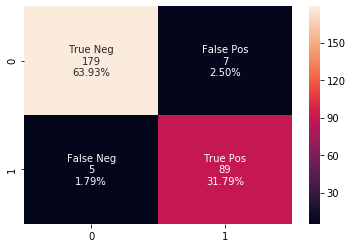

In [36]:
import seaborn as sns
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cf_matrix, annot=labels, fmt="")

ax.set_ylim(2,0)